# Project Description:
In this particular project, we are using a dataset that contains information like
quality category, citric acid quantity, chlorides density etc and using it to predict
red wine quality.
However, before you go ahead and make a prediction, it is advised that you first
pre-process the data, since it may contain some irregularities and noise.
In addition, try various tricks and techniques in order to gain the best accuracy
in your predictions.


## Data Exploration and Pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/home/kali/Downloads/wine-quality_dataset.csv')

In [4]:
df.head(10)

,Quality_Category,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,sulphates,alcohol
0,0,0.30,0.34,1.6,0.049,14,132,0.994,0.49,9.5
1,0,0.23,0.32,8.5,0.058,47,186,0.996,0.40,9.9
2,0,0.28,0.40,6.9,0.050,30,97,0.995,0.44,10.1
3,0,0.32,0.16,7.0,0.045,30,136,0.995,0.47,9.6
4,0,0.27,0.36,20.7,0.045,45,170,1.001,0.45,8.8
5,0,0.30,0.34,1.6,0.049,14,132,0.994,0.49,9.5
6,0,0.22,0.43,1.5,0.044,28,129,0.994,0.45,11.0
7,0,0.27,0.41,1.5,0.033,11,63,0.991,0.56,12.0
8,0,0.23,0.40,4.2,0.035,17,109,0.995,0.53,9.7
9,0,0.18,0.37,1.2,0.040,16,75,0.992,0.63,10.8


In [5]:
df.shape

(4894, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894 entries, 0 to 4893
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Quality_Category    4894 non-null   int64  
 1   volatileacidity     4894 non-null   float64
 2   citricacid          4894 non-null   float64
 3   residualsugar       4894 non-null   float64
 4   chlorides           4894 non-null   float64
 5   freesulfurdioxide   4894 non-null   int64  
 6   totalsulfurdioxide  4894 non-null   int64  
 7   density             4894 non-null   float64
 8   sulphates           4894 non-null   float64
 9   alcohol             4894 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 382.5 KB


In [7]:
df.isnull().sum()

Quality_Category      0
volatileacidity       0
citricacid            0
residualsugar         0
chlorides             0
freesulfurdioxide     0
totalsulfurdioxide    0
density               0
sulphates             0
alcohol               0
dtype: int64

In [8]:
df.describe()

,Quality_Category,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,sulphates,alcohol
count,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000
mean,0.216387,0.278335,0.334146,6.391582,0.045773,35.311606,138.368615,0.994048,0.489904,10.514610
std,0.411823,0.100801,0.121047,5.071695,0.021855,17.019553,42.498278,0.003007,0.114153,1.230665
min,0.000000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987000,0.220000,8.000000
25%,0.000000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.992000,0.410000,9.500000
50%,0.000000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.994000,0.470000,10.400000
75%,0.000000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996000,0.550000,11.400000
max,1.000000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.039000,1.080000,14.200000


In [9]:
# Target Variable

In [10]:
df.Quality_Category.unique()

array([0, 1])

In [11]:
df.columns

Index(['Quality_Category', 'volatileacidity', 'citricacid', 'residualsugar',
       'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density',
       'sulphates', 'alcohol'],
      dtype='object')

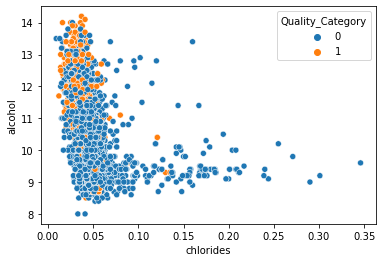

In [12]:
sns.scatterplot(df.chlorides,df.alcohol,hue=df.Quality_Category)

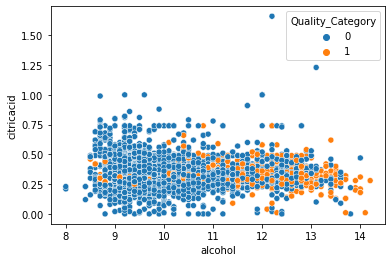

In [13]:
sns.scatterplot(df.alcohol,df.citricacid,hue=df.Quality_Category)

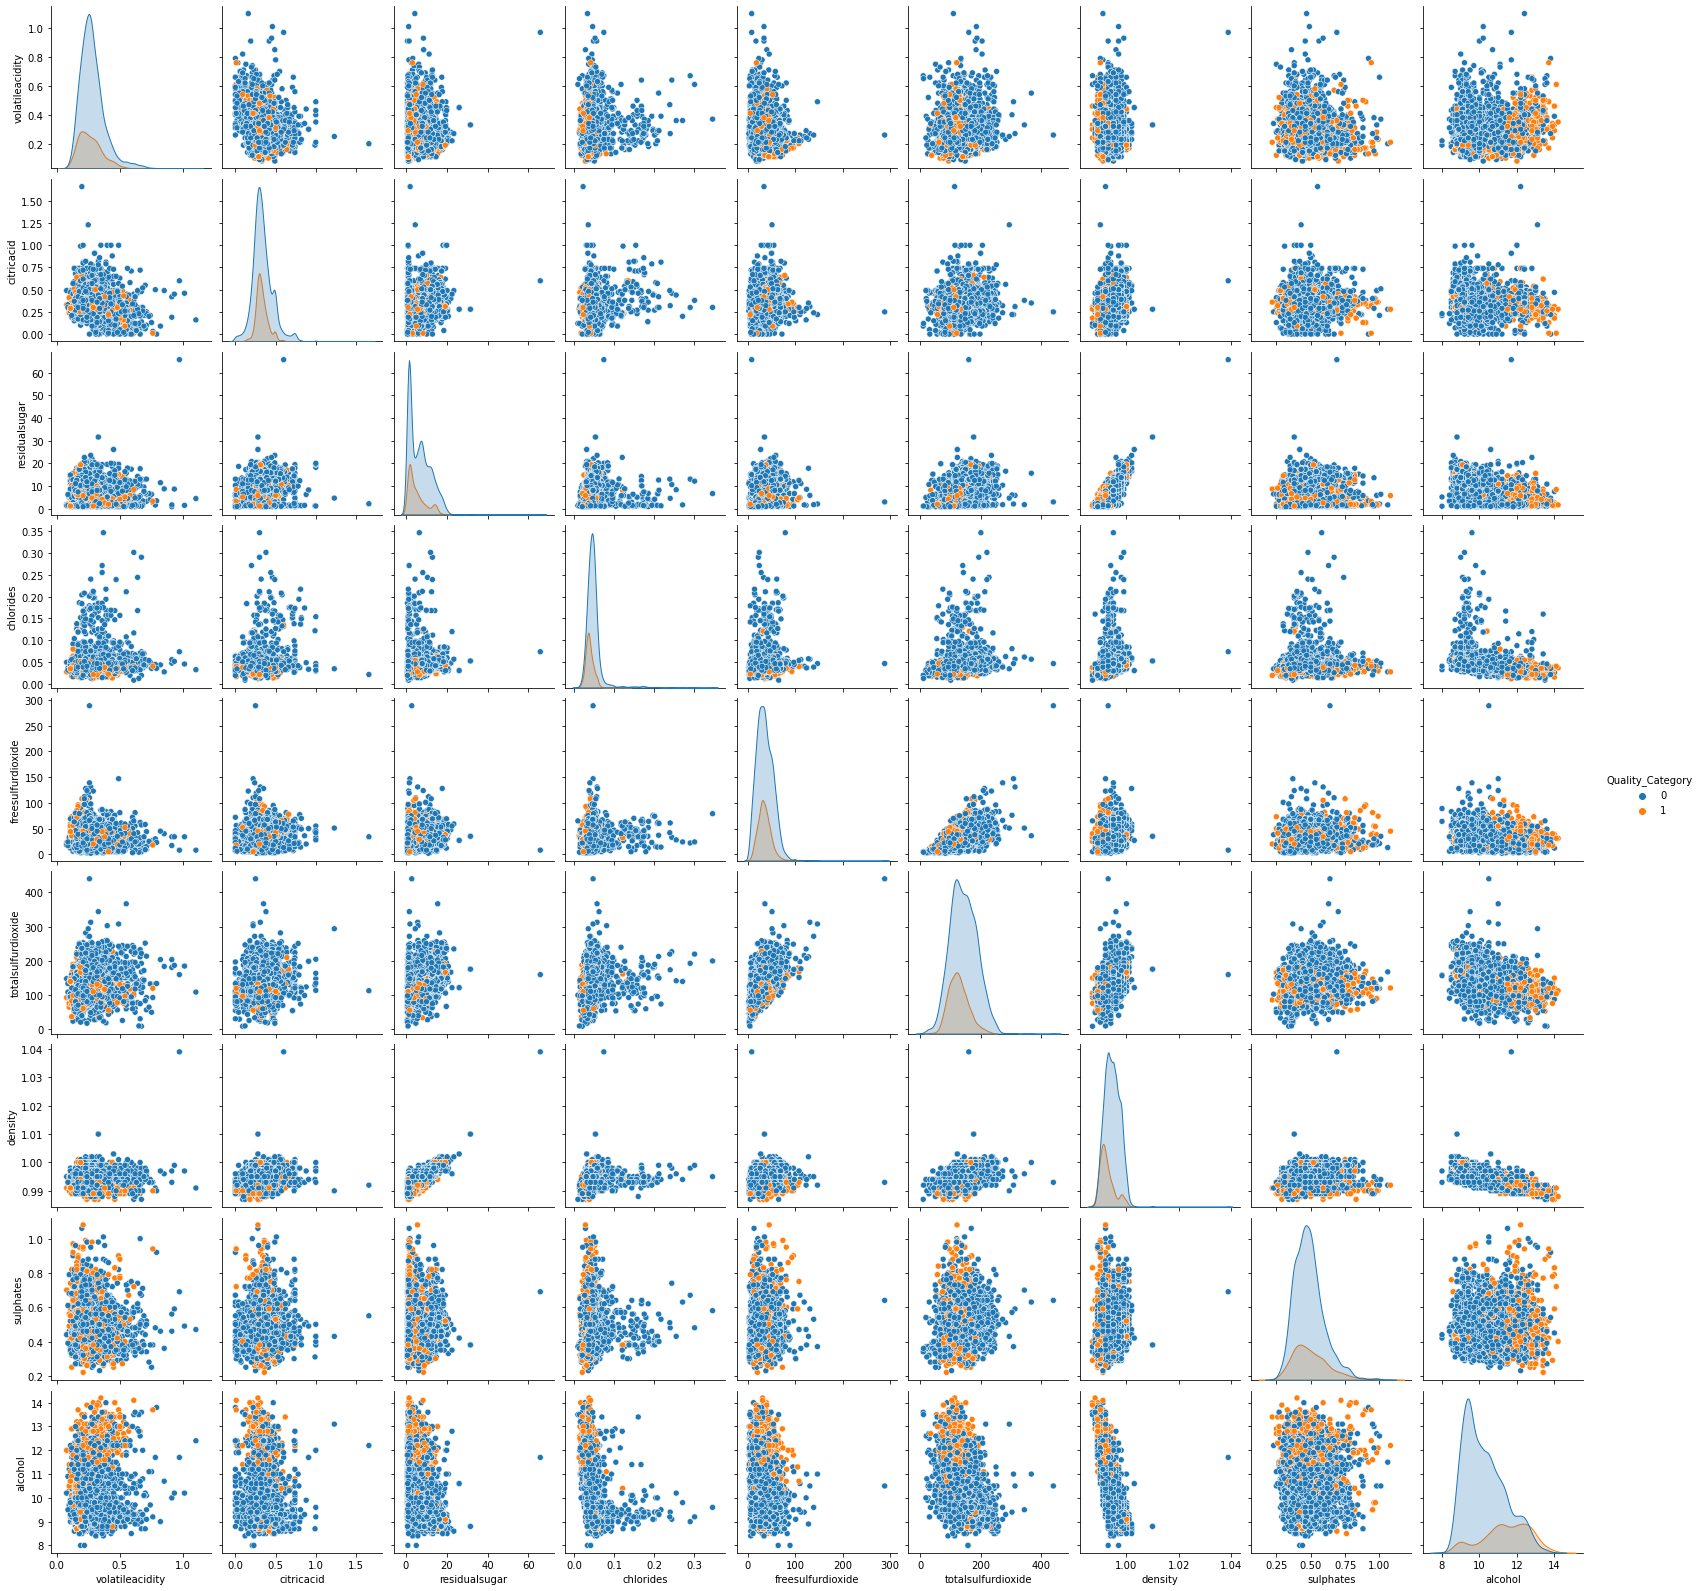

In [14]:
sns.pairplot(df,hue='Quality_Category')

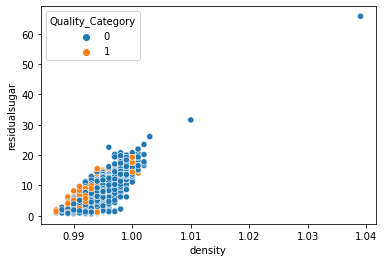

In [15]:
sns.scatterplot(df.density,df.residualsugar,hue=df.Quality_Category)

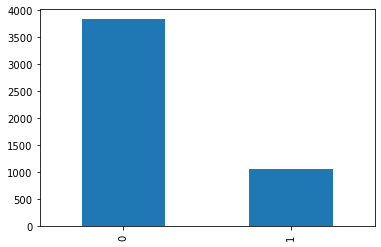

In [16]:
df['Quality_Category'].value_counts().plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3f52a7d00>,
      dtype=object)

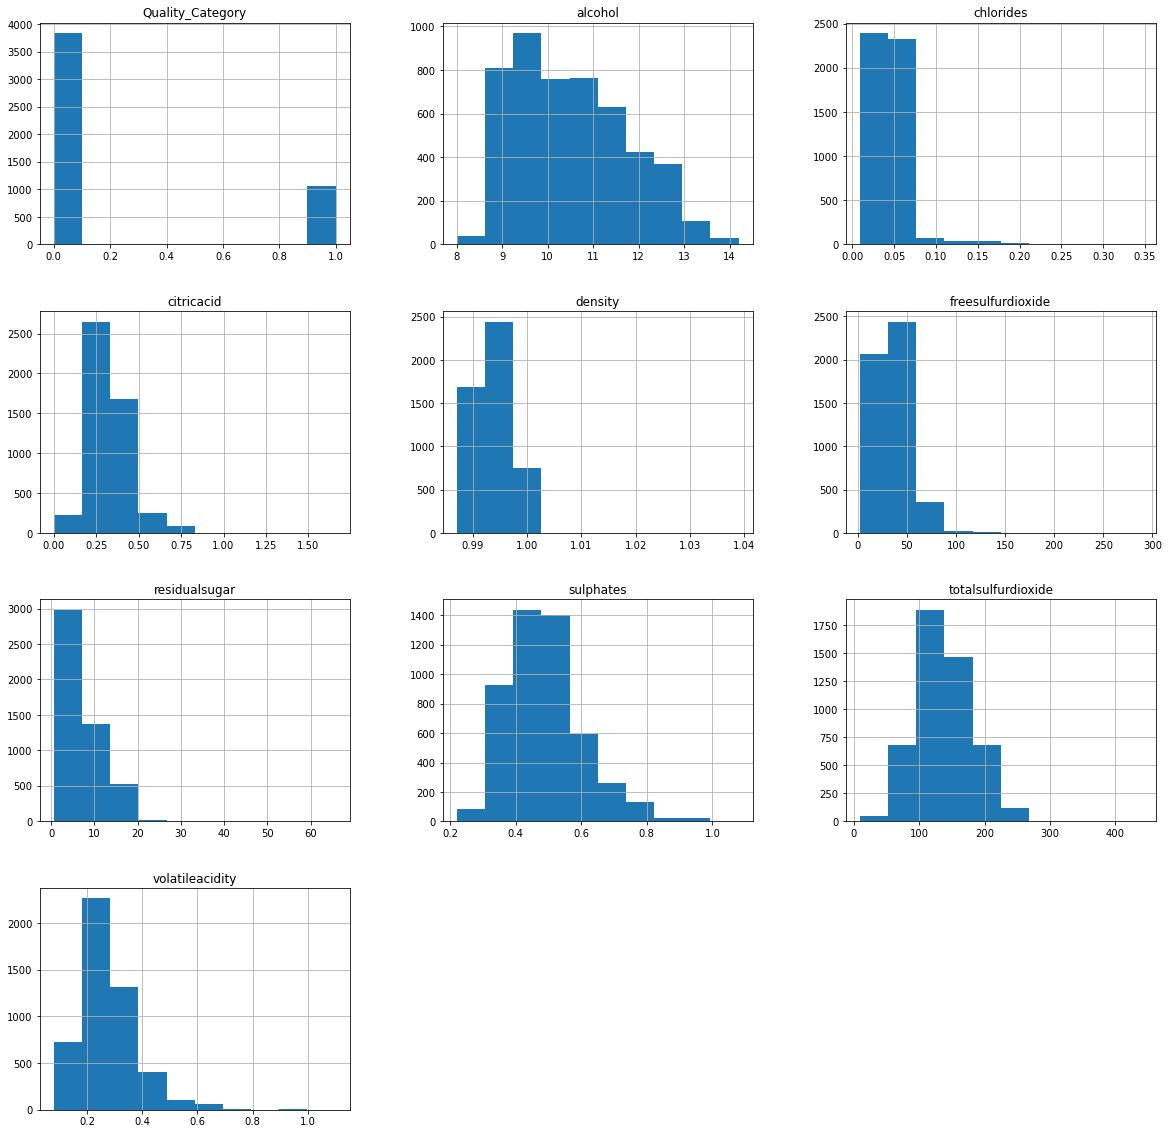

In [17]:
df.hist(figsize=(20,20))

# Spliting the dataset into Train Test and validation
- 60% Train data
- 20% validation data
- 20% test data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x = df.drop('Quality_Category',axis=1)

In [20]:
x.head()

,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,sulphates,alcohol
0,0.30,0.34,1.6,0.049,14,132,0.994,0.49,9.5
1,0.23,0.32,8.5,0.058,47,186,0.996,0.40,9.9
2,0.28,0.40,6.9,0.050,30,97,0.995,0.44,10.1
3,0.32,0.16,7.0,0.045,30,136,0.995,0.47,9.6
4,0.27,0.36,20.7,0.045,45,170,1.001,0.45,8.8


In [21]:
y = df['Quality_Category']

In [22]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Quality_Category, dtype: int64

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4)

In [24]:
x_test,x_val,y_test,y_val = train_test_split(x_test,y_test,test_size=0.5)

In [25]:
x_test.head()

,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,sulphates,alcohol
1093,0.23,0.21,5.1,0.035,29,142,0.994,0.33,10.1
2582,0.18,0.30,12.8,0.062,19,171,0.998,0.52,9.0
1753,0.29,0.23,8.6,0.056,56,215,0.997,0.44,8.8
259,0.29,0.40,13.6,0.045,66,231,0.998,0.59,9.6
4189,0.27,0.33,1.3,0.045,26,100,0.991,0.44,12.4


In [26]:
x_val.head()

,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,sulphates,alcohol
3291,0.28,0.41,7.0,0.046,59,194,0.996,0.48,9.4
4405,0.29,0.29,3.3,0.037,32,140,0.990,0.36,12.8
21,0.25,0.32,9.0,0.046,56,245,0.996,0.50,10.4
2655,0.15,0.34,1.0,0.033,27,73,0.990,0.41,12.2
4347,0.31,0.28,2.5,0.039,34,137,0.989,0.38,12.7


In [27]:
x_train.head()

,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,sulphates,alcohol
4279,0.20,0.26,6.8,0.049,22,93,0.993,0.42,11.0
404,0.14,0.39,1.2,0.044,26,116,0.992,0.53,10.3
4265,0.46,0.23,13.7,0.045,44,192,0.998,0.53,9.4
2827,0.45,0.43,7.2,0.064,31,186,0.995,0.44,9.4
1576,0.31,0.49,15.4,0.046,13,119,1.000,0.45,9.5


In [28]:
for dataset in [x_train,x_test,x_val]:
    print(len(dataset)/len(y))

0.59991826726604
0.20004086636697999
0.20004086636697999


In [29]:
for dataset in [y_train,y_test,y_val]:
    print(len(dataset))

2936
979
979


In [30]:
x_train.to_csv('train_features.csv',index=False)
y_train.to_csv('train_label.csv',index=False)
x_test.to_csv('test_features.csv',index=False)
y_test.to_csv('test_label.csv',index=False)
x_val.to_csv('val_features.csv',index=False)
y_val.to_csv('val_label.csv',index=False)